In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 
import warnings
warnings.filterwarnings("ignore")

# <font face="gotham" color="purple"> Visualization of Linear Combination in $\mathbb{R}^2$

Consider two vectors $u$ and $v$ in $\mathbb{R}^2$, and they are independent of each other, i.e. not pointing to the same or opposite direction. Therefore any vector in the $\mathbb{R}^2$ can be represented by a <font face="gotham" color="red"> linear combination</font> of $u$ and $v$

For instance, this is a linear combination and essentially a linear system.

$$
c_1
\left[
\begin{matrix}
4\\
2
\end{matrix}
\right]+
c_2
\left[
\begin{matrix}
-2\\
2
\end{matrix}
\right]
=
\left[
\begin{matrix}
2\\
10
\end{matrix}
\right]
$$

Solve the system in SymPy:

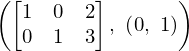

In [5]:
A = sy.Matrix([[4, -2, 2], [2,2,10]])
A.rref()

The solution is $(c_1, c_2)^T = (2, 3)^T$, which means the sum of 2 times of $\left[
\begin{matrix}
4\\
2
\end{matrix}
\right]$ and 3 times of $\left[
\begin{matrix}
-2\\
2
\end{matrix}
\right]$ is $\left[
\begin{matrix}
2\\
10
\end{matrix}
\right]$. 

Besides plotting the vectors and its addition, we would like to plot the coordinates of basis that spanned by $u$ and $v$ as well. We will explain further in later chapter.

We can calcuate the slope of vectors
$$
s_1 =\frac{y}{x} = \frac{2}{4}=.5\\
s_2 =\frac{y}{x}= \frac{2}{-2}=.-1
$$

The basis can be constructed as:
$$
y_1 = a+.5x\\
y_2 = b-x
$$

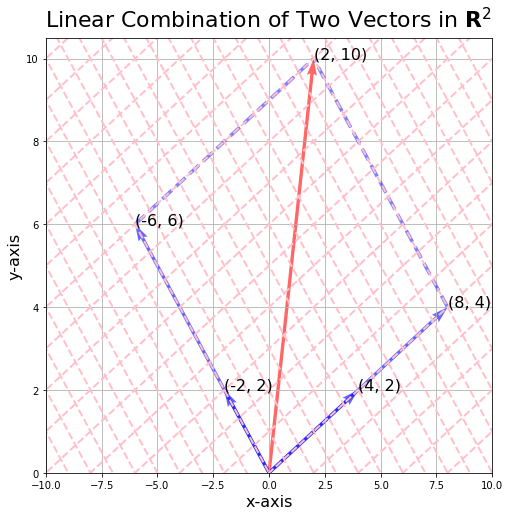

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

for i in a:    
    y1 = i + .5*x
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

# <font face="gotham" color="purple"> Linear Combination Visualization in 3D

We can show that any vectors in $\mathbb{R}^3$ can be a linear combination of a standard basis, which we will see again later.This time, we upgrade the difficulty, we create a function for drawing linear combination of standard basis in 3D, we only need to provide the <font face="gotham" color="red">scalar multiplier</font>.

<IPython.core.display.Javascript object>


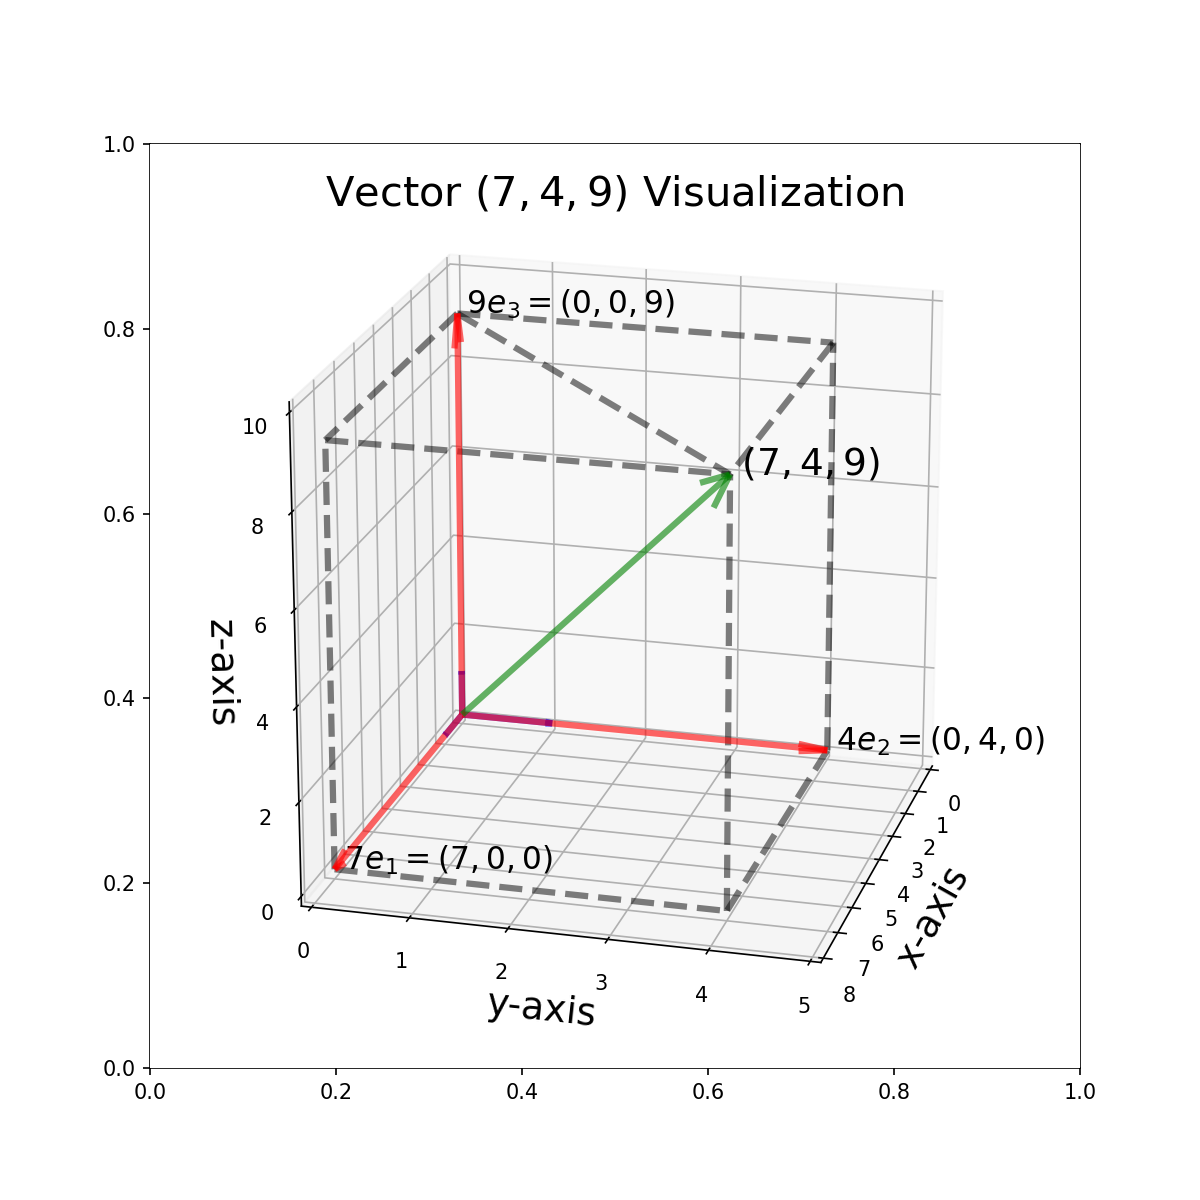

In [8]:
def linearCombo(a, b, c):
    %matplotlib notebook
    '''This function is for visualizing linear combination of standard basis in 3D.
    Function syntax: linearCombo(a, b, c), where a, b, c are the scalar multiplier, 
    also the elements of the vector.
    '''
    fig, ax = plt.subplots(figsize = (8, 8))
    ax = fig.gca(projection='3d')
    ######################## Standard basis and Scalar Multiplid Vectors#########################
    vec = np.array([[[0, 0, 0, 1, 0, 0]], # e1
                    [[0, 0, 0, 0, 1, 0]], # e2
                    [[0, 0, 0, 0, 0, 1]], # e3
                    [[0, 0, 0, a, 0, 0]], # a* e1
                    [[0, 0, 0, 0, b, 0]], # b* e2
                    [[0, 0, 0, 0, 0, c]], # c* e3
                    [[0, 0, 0, a, b, c]]]) # ae1 + be2 + ce3
    colors = ['b','b','b','r','r','r','g']
    for i in range(vec.shape[0]): 
        X, Y, Z, U, V, W = zip(*vec[i,:,:])
        ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
                  color = colors[i] ,arrow_length_ratio = .08, pivot = 'tail',
                  linestyles = 'solid',linewidths = 3, alpha =.6)
    
    #################################Plot Rectangle Boxes##############################
    dlines = np.array([[[a, 0, 0],[a, b, 0]],
                      [[0, b, 0],[a, b, 0]],
                      [[0, 0, c],[a, b, c]],
                      [[0, 0, c],[a, 0, c]],
                      [[a, 0, c],[a, b, c]],
                      [[0, 0, c],[0, b, c]],
                      [[0, b, c],[a, b, c]],
                      [[a, 0, 0],[a, 0, c]],
                      [[0, b, 0],[0, b, c]],
                      [[a, b, 0],[a, b, c]]])
    colors = ['k','k','g','k','k','k','k','k','k']
    for i in range(dlines.shape[0]):
        ax.plot(dlines[i,:,0], dlines[i,:,1], dlines[i,:,2], lw =3, ls = '--', color = 'black', alpha=0.5)
    
    #################################Annotation########################################
    ax.text(x = a, y = b, z = c, s= ' $(%0.d, %0.d, %.0d)$'% (a, b, c), size = 18)
    ax.text(x = a, y = 0, z = 0, s= ' $%0.d e_1 = (%0.d, 0, 0)$'% (a, a), size = 15)
    ax.text(x = 0, y = b, z = 0, s= ' $%0.d e_2 = (0, %0.d, 0)$'% (b, b), size = 15)
    ax.text(x = 0, y = 0, z = c, s= ' $%0.d e_3 = (0, 0, %0.d)$' %(c, c), size = 15)
    
    #################################Axis Setting######################################
    ax.grid()
    ax.set_xlim([0, a+1])
    ax.set_ylim([0, b+1])
    ax.set_zlim([0, c+1])
    
    ax.set_xlabel('x-axis', size = 18)
    ax.set_ylabel('y-axis', size = 18)
    ax.set_zlabel('z-axis', size = 18)
    
    ax.set_title('Vector $(%0.d, %0.d, %.0d)$ Visualization' %(a, b, c), size = 20)
    
    ax.view_init(elev=20., azim=15)

if __name__ == '__main__':
    a = 7
    b = 4
    c = 9
    linearCombo(a, b, c)


# <font face="gotham" color="purple"> Linear Combination of Inconsistent System</font>

## <font face="gotham" color="purple"> One Free Variable</font>

We have seen how inconsistent systems can be solved in the earlier lectures.Now we will see what solution means from the perspective of linear combination.

Consider a system

$$
\left[
\begin{matrix}
1 & 1 & 2\\
-2 &0 & 1\\
1& 1 & 2
\end{matrix}
\right]
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
1\\-3\\1
\end{matrix}
\right]
$$

Solve in SymPy:

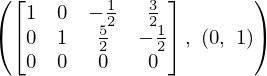

In [9]:
A = sy.Matrix([[1,1,2,1],[-2,0,1,-3],[1,1,2,1]])
A.rref()

The solution is not unique, due to a free variable: 

$$
c_1 - \frac{1}{2}c_3 =\frac{3}{2}\\
c_2 + \frac{5}{2}c_3 = -\frac{1}{2}\\
c_3 = free
$$

Let $c_3 = t$,  the system can be parameterized:

$$
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
\frac{3}{2}+\frac{1}{2}t\\
-\frac{1}{2}-\frac{5}{2}t\\
t
\end{matrix}
\right]
$$

The solution is a line with infinite length, but we can still visualize a segment if we set the range.

For instance, we set the range of $t\in (-1, 1)$, the solution looks like:

<IPython.core.display.Javascript object>


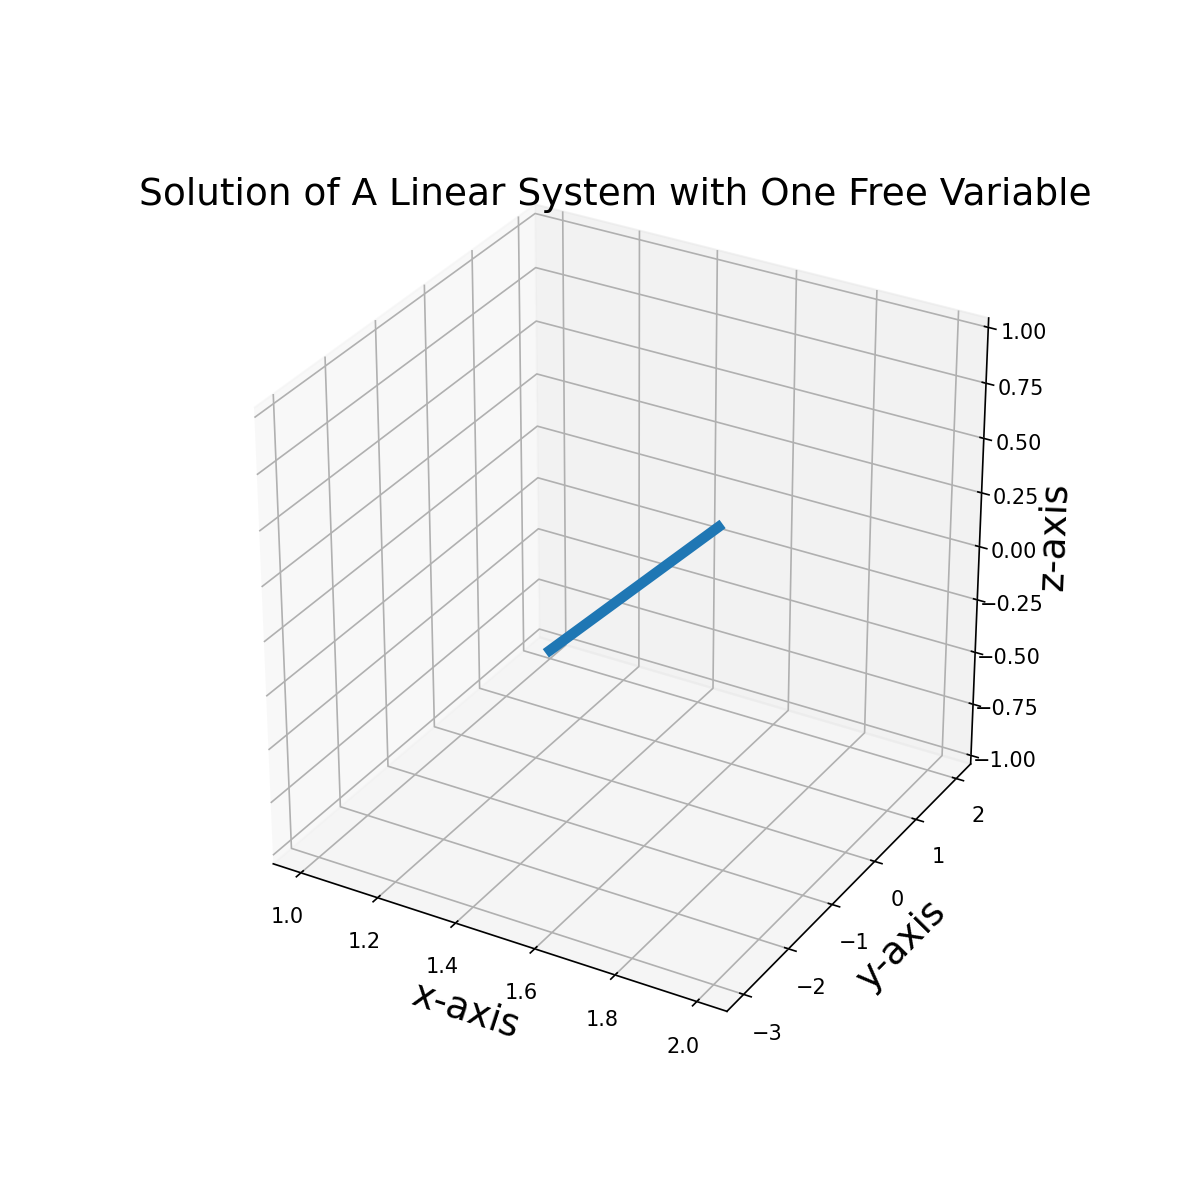

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

t = np.linspace(-1, 1, 10)
c1 = 3/2+t/2
c2 = -1/2-5/2*t

ax.plot(c1, c2, t, lw = 5)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.set_title('Solution of A Linear System with One Free Variable', size = 18)
plt.show()

## <font face="gotham" color="purple"> Two Free Variables</font>

Now consider the linear system:
$$
\left[
\begin{matrix}
1 & -3 & -2\\
0 &0 & 0 \\
0& 0 & 0 
\end{matrix}
\right]
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
0\\0\\0
\end{matrix}
\right]
$$
The augmented matrix is
$$
\left[
\begin{matrix}
1 & -3 & -2 & 0\\
0 &0 & 0 & 0\\
0& 0 & 0 & 0
\end{matrix}
\right]
$$

Then we have two free variables
$$
\begin{align}
x_1 &= 3x_2+2x_3\\
x_2 &= free\\
x_3 &= free
\end{align}
$$
Rewrite the solution 

$$
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
3x_2+2x_3\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[\begin{array}{c}
3 x_{2} \\
x_{2} \\
0
\end{array}\right]+\left[\begin{array}{c}
2 x_{3} \\
0 \\
x_{3}
\end{array}\right]=
x_{2}\left[\begin{array}{l}
3 \\
1 \\
0
\end{array}\right]+x_{3}\left[\begin{array}{l}
2 \\
0 \\
1
\end{array}\right]
$$

The solution is a plain spanned by two vectors $(3, 1, 0)^T$ and $(2, 0, 1)^T$. Let's visualize the plane and spanning vectors.

We also plot another vector $v = (2,2,1)$ which is not a linear combination of $(3, 1, 0)^T$ and $(2, 0, 1)^T$. As you pan around the view angle, it is apparent that $v$ is not in the same plane of basis vectors.

<IPython.core.display.Javascript object>


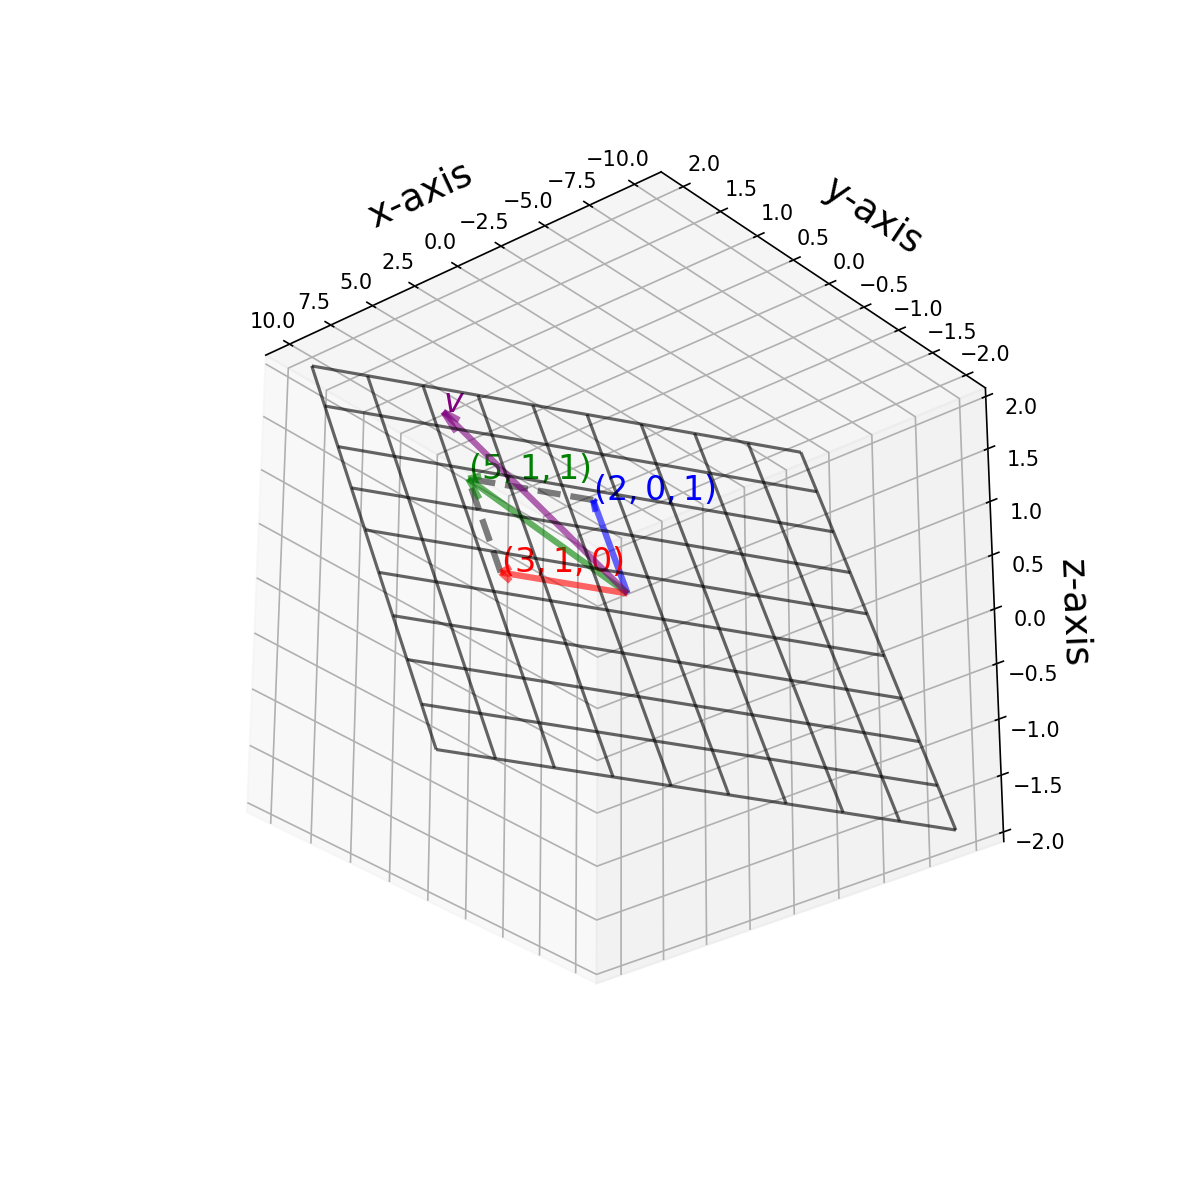

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'k', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 5, 1, 1]],
               [[0, 0, 0, 2, 2, 1]]])
colors = ['r', 'b', 'g', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 5, y = 1, z = 1, s='$(5, 1, 1)$', color = 'green', size = 16)
ax.text(x = 2, y = 2, z = 1, s='$v$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)


# <font face="gotham" color="purple">Linear Combination of Polynomial

In a more general sense, a funcion or a polynomial can also be a linear combination of other functions or polynomials.

Now consider a polynomial $p(x)=4 x^{3}+5 x^{2}-2 x+7$, determine if it is a linear combination of three polynomials below:
$$
p_{1}(x)=x^{3}+2 x^{2}-x+1\\
p_{2}(x)=2 x^{3}+x^{2}-x+1\\
p_{3}(x)=x^{3}-x^{2}-x-4
$$

which means that we need to figure out if the equation below holds

$$
c_{1}\left(x^{3}+2 x^{2}-x+1\right)+c_{2}\left(2 x^{3}+x^{2}-x+1\right)+c_{3}\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Rearrange and collect terms
$$
\left(c_{1}+2 c_{2}+c_{3}\right) x^{3}+\left(2 c_{1}+c_{2}-c_{3}\right) x^{2}+\left(-c_{1}-c_{2}-c_{3}\right) x+\left(c_{1}+c_{2}-4 c_{3}\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Equate the coefficients and extract the augmented matrix
$$
\begin{aligned}
&c_{1}+2 c_{2}+c_{3}=4\\
&2 c_{1}+c_{2}-c_{3}=5\\
&-c_{1}-c_{2}-c_{3}=-2\\
&c_{1}+c_{2}-4 c_{3}=7\\
&\left(\begin{array}{cccc}
1 & 2 & 1 & 3 \\
2 & 1 & -1 & 5 \\
-1 & -1 & -1 & -2 \\
1 & 1 & -4 & 7
\end{array}\right)
\end{aligned}
$$

Before solving, we notice that the system has 4 equations, but 3 unknowns, this case is called over-determined.

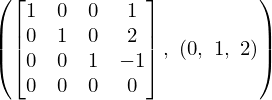

In [12]:
A = sy.Matrix([[1,2,1,4],[2,1,-1,5],[-1,-1,-1,-2],[1,1,-4,7]])
A.rref()

We get the answer
$$
\left(x^{3}+2 x^{2}-x+1\right)+2\left(2 x^{3}+x^{2}-x+1\right)-\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$

Indeed we have just established a linear combination between these polynomials.